# Storytelling - Visualizaciones en Python - Macroeconomía Peruana
**Tópicos de Economía de la Empresa - E2TEE9**

### PRIMERA PRÁCTICA INDIVIDUAL

### **Nombres: Luis Edward Velo Poma**

- La práctica será desarrollada en Jupyter Notebook
- Debe ser entregada hasta el lunes 16 de setiembre a las 9:00. Cada hora adicional implica un punto menos en la calificación. 
- La práctica está diseñada para que la terminen en menos de cuatro horas. Pueden consultar sus notas de clase y cualquier otra fuente que sea necesaria para responder las preguntas. En caso quieran citen directamente a algún autor, hagan la referencia necesaria. 
- Las preguntas tienen un componente de programación y un componente de conocimiento económico. Para el segundo componente, sugiero hacer una búsqueda rápida biblográfica para sustentar los insights de sus respuestas. 
- La calificación de cada una de las 10 preguntas se divide de la siguiente manera: 
        Planteamiento correcto del problema [0.5 puntos]
        Ejecución correcta de código en Python [1 punto]
        Interpretación y comentario [0.5 puntos]

In [57]:
#Importando librerias importantes para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

In [58]:
pd.set_option('display.max_columns', None) #Mostrando máximo de columnas

#leyendo la data limpia
data = pd.read_csv(r'C:\Users\USER\Desktop\storytelling\Proyecto_Storytelling_practica_1-1\Proyecto\data\final_economia_bcrp.csv')
data

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Publico,Inversion Bruta Interna,Inversion Bruta Fija,Inversion Bruta Fija - Privada,Inversion Bruta Fija - Publica,Exportaciones de BBySS,Importaciones de BBySS,PBI Agropecuario,PBI Pesca,PBI Mineria e Hidrocarburos,PBI Manufactura,PBI Electricidad y Agua,PBI Construccion,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios,Inversion Publica,Resultado economico SPNF,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares
0,1922.0,-4.7,5.1,14122.0,12688.0,10616.0,630.0,1442.0,1783.0,NaN,NaN,2845.0,1410.0,2519.0,NaN,1650.0,1774.0,19.0,592.0,1987.0,5582.0,4169.0,9953.0,NaN,NaN,6.0,-2.3,0.0
1,1923.0,-5.1,4.5,14756.0,13103.0,10437.0,677.0,1989.0,2154.0,NaN,NaN,3358.0,1705.0,2522.0,NaN,1858.0,1853.0,20.0,660.0,2037.0,5807.0,4380.0,10377.0,NaN,NaN,12.7,2.4,0.0
2,1924.0,3.8,8.9,16070.0,14566.0,11335.0,796.0,2435.0,2519.0,NaN,NaN,3515.0,2012.0,2625.0,NaN,2219.0,1930.0,21.0,729.0,2182.0,6364.0,4844.0,11226.0,NaN,NaN,3.8,0.0,0.0
3,1925.0,7.1,3.1,16575.0,15162.0,11272.0,873.0,3017.0,2696.0,NaN,NaN,3391.0,1978.0,2555.0,NaN,2456.0,2005.0,22.0,736.0,2187.0,6614.0,5012.0,11564.0,NaN,NaN,2.4,3.5,0.0
4,1926.0,0.6,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,NaN,4343.0,1989.0,2752.0,NaN,2914.0,2135.0,23.0,820.0,2314.0,7172.0,5666.0,12464.0,NaN,NaN,5.9,-1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017.0,2.8,2.5,514215.0,503469.0,329870.0,59191.0,114408.0,116227.0,93193.0,23034.0,140989.0,130243.0,27328.0,1921.0,71823.0,64669.0,9412.0,29748.0,55767.0,253546.0,101072.0,413143.0,4.6,-3.0,2.3,2.1,3.3
96,2018.0,1.3,4.0,534665.0,523912.0,342501.0,59417.0,121994.0,121329.0,97029.0,24300.0,144059.0,133306.0,29429.0,2838.0,70749.0,68475.0,9826.0,31335.0,57243.0,264771.0,103016.0,431649.0,4.7,-2.3,2.9,1.9,3.3
97,2019.0,2.1,2.2,546605.0,535578.0,353615.0,60702.0,121260.0,125337.0,101406.0,23930.0,145697.0,134669.0,30471.0,2351.0,70715.0,67336.0,10212.0,31788.0,58960.0,274328.0,103537.0,442624.0,4.6,-1.6,2.3,2.3,3.3
98,2020.0,1.8,-11.0,486402.0,482670.0,318739.0,65414.0,98517.0,105022.0,84694.0,20328.0,117099.0,113367.0,30784.0,2450.0,61229.0,58894.0,9585.0,27492.0,49539.0,246014.0,94463.0,391524.0,4.3,-8.9,-3.4,1.4,3.5


## Pregunta 1:

#### Mostrar un gráfico de línea que muestre el promedio móvil de cinco años de la inflación desde el año 1995

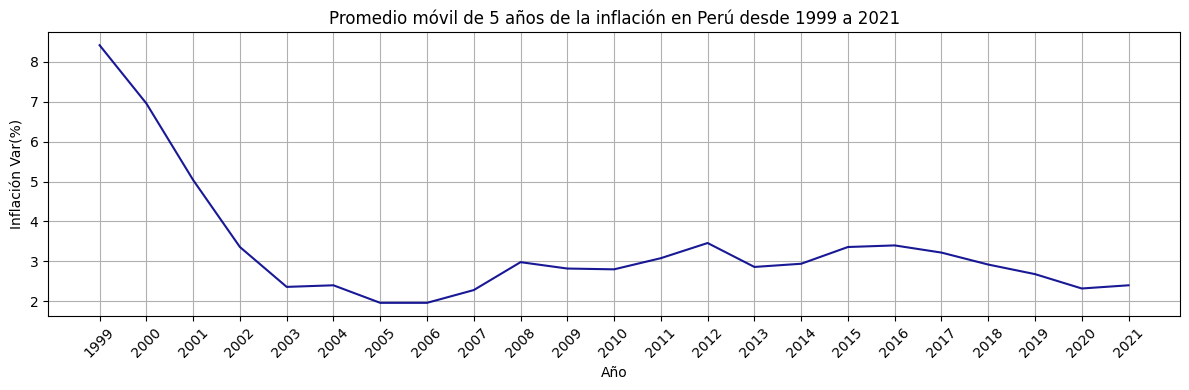

In [68]:
#Filtrando la data desde 1995
data_filtered = data.copy()
data_filtered = data_filtered[data_filtered['Año'] >= 1995]
# Calculando promedio movil de 5 años de la inflación desde 1995
data_filtered['media_movil_5'] = data_filtered['Peru_inflación'].rolling(window=5).mean()

# Graficando la inflación suavizada
fig, ax = plt.subplots(figsize=(12,4))

# Filtrando los datos desde 1999
x = data_filtered.Año[data.Año >= 1999]
y = data_filtered.media_movil_5[data.Año >= 1999]

ax.plot(x, y, label='Inflacion_media_movil_5_años', color='darkblue', alpha=0.9)

# Seleccionando cada segundo tick
ticks = x[::1]

ax.set_xticks(ticks)
plt.xticks(rotation=45)

plt.title("Promedio móvil de 5 años de la inflación en Perú desde 1999 a 2021")
plt.xlabel("Año")
plt.ylabel("Inflación Var(%)")
plt.grid(True)
plt.tight_layout()
plt.show();

#### **¿Desde qué año el promedio la inflación peruana se encuentra debajo del 3 %? ¿Ha habido algún año que se desvía de esta trayectoria?**

### 📉 Evolución de la Inflación en Perú (2003-2021)

### 🔍 **Análisis General**
Desde **2003**, el promedio de la inflación en Perú se mantiene estable **por debajo del 3 %** hasta fines de **2010**, con una única excepción notable en **2012** 📈, donde el promedio supera ese nivel. Luego, entre **2013 y 2014**, vuelve a situarse ligeramente por debajo del 3 %.

Sin embargo, entre **2015 y 2017** ⚠️, se observa una **desviación considerable**, indicando un aumento en el promedio de la inflación. A partir de **2018**, el promedio desciende de manera significativa, manteniéndose en una **tendencia a la baja** 📉 hasta **2021**. Esto refleja tanto políticas económicas como situaciones coyunturales que afectaron la estabilidad inflacionaria en esos años.

### 📊 **Factores Económicos Clave**
La trayectoria de la inflación en Perú desde **2003** refleja un **control efectivo** gracias a la adopción del **esquema de metas de inflación** por parte del Banco Central de Reserva del Perú (BCRP) en **2002**, lo que permitió una reducción sostenida de la inflación por debajo del **3 %** hasta **2010**. 

Sin embargo, en **2012**, la inflación superó temporalmente el **3 %** 📈 debido a **choques externos**, como el aumento de los precios de los alimentos y materias primas **(Morón y Quispe, 2013).**

Entre **2015 y 2017**, la inflación experimentó otra **desviación** ⚠️ debido a fenómenos climáticos como **El Niño** 🌧️, que afectaron la oferta agrícola, y la depreciación del tipo de cambio por factores externos.

A partir de **2018**, la inflación volvió a descender 📉 significativamente, en parte por el menor dinamismo económico global y la estabilidad de las expectativas inflacionarias **(Rossini y Quispe, 2019)**. Estos factores permitieron que la inflación se mantuviera baja hasta **2021**.


## Pregunta 2
#### Mostrar un gráfico de línea doble que muestre el tipo de cambio nominal del dólar y el crecimiento del PBI

In [ ]:
#Filtrando columnas necesarias para el ploteo
data_doble_graph = data.copy()
data_doble_graph = data_doble_graph[['Año', 'Peru_inflación', 'Peru_PBI', 'Peru_TC_compra', 'Peru_TC_venta', 'Peru_Reservas_internacionales']]